In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
train = pd.read_csv('train.csv')
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [37]:
test = pd.read_csv('test.csv')
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [38]:
data = train.append(test, ignore_index=True, sort=False)
print(train.shape,test.shape,data.shape)

(54808, 14) (23490, 13) (78298, 14)


In [39]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78298 entries, 0 to 78297
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  object 
 2   region                78298 non-null  object 
 3   education             74855 non-null  object 
 4   gender                78298 non-null  object 
 5   recruitment_channel   78298 non-null  object 
 6   no_of_trainings       78298 non-null  int64  
 7   age                   78298 non-null  int64  
 8   previous_year_rating  72362 non-null  float64
 9   length_of_service     78298 non-null  int64  
 10  KPIs_met >80%         78298 non-null  int64  
 11  awards_won?           78298 non-null  int64  
 12  avg_training_score    78298 non-null  int64  
 13  is_promoted           54808 non-null  float64
dtypes: float64(2), int64(7), object(5)
memory usage: 8.4+ MB


In [41]:
data.isnull().sum()

employee_id                 0
department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

In [42]:
data.nunique()

employee_id             78298
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

In [43]:
data.is_promoted.value_counts()

0.0    50140
1.0     4668
Name: is_promoted, dtype: int64

## HANDLING MISSING VALUES


In [44]:
data.education.unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [45]:
data.previous_year_rating.unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

In [46]:
data.education.value_counts()

Bachelor's          52247
Master's & above    21429
Below Secondary      1179
Name: education, dtype: int64

In [47]:
data.previous_year_rating.value_counts()

3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
Name: previous_year_rating, dtype: int64

In [48]:
data['education'] = data['education'].fillna('Secondary')
data['previous_year_rating'] = data['previous_year_rating'].fillna(3.0)
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0


In [49]:
data.isnull().sum()

employee_id                 0
department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating        0
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

In [50]:
data.shape

(78298, 14)

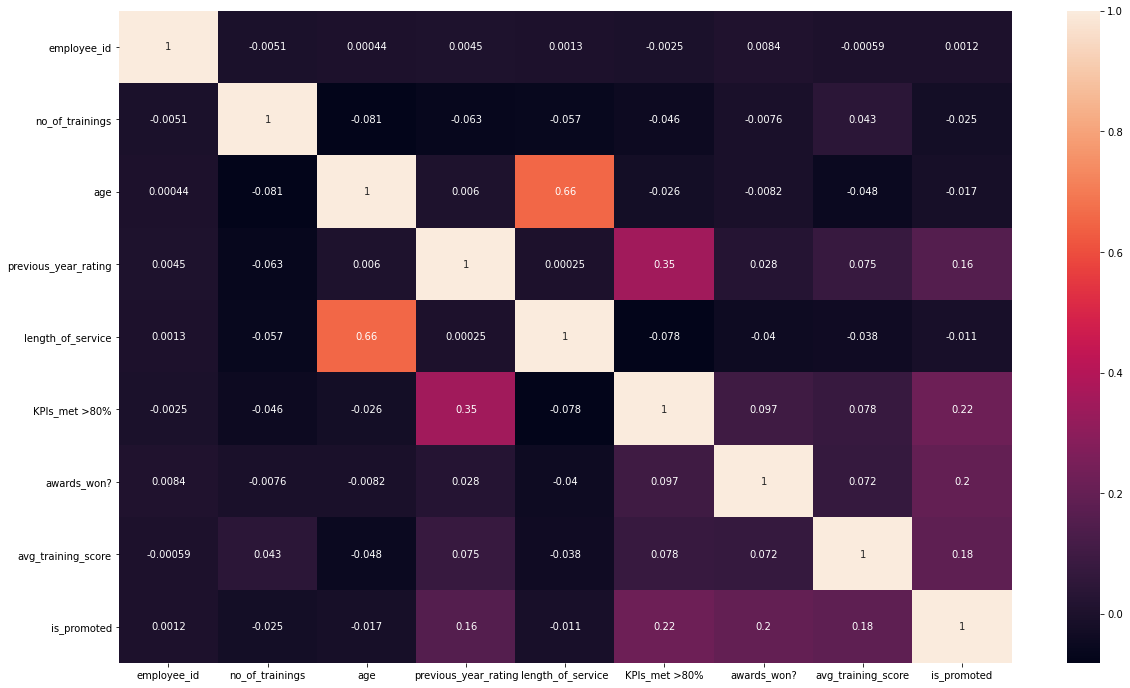

In [51]:
corr=train.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr,annot=True)

In [52]:
dftrain=data[data['is_promoted'].isnull()!=True]
dftest=data[data['is_promoted'].isnull()==True]
dftest.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54808,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,3.0,1,1,0,77,NaN
54809,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,NaN
54810,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,NaN
54811,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,NaN
54812,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,NaN


In [53]:
X,y=dftrain.drop(['employee_id','is_promoted'],axis=1),dftrain['is_promoted']

In [54]:
X.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73


In [55]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.25,random_state = 1994,stratify=y)

In [56]:
categorical_features_indices = np.where(X_train.dtypes =='object')[0]
categorical_features_indices

array([0, 1, 2, 3, 4])

In [57]:
!pip install catboost
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [58]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier,LGBMRegressor
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,f1_score,mean_squared_error

In [59]:
train['is_promoted'].value_counts()/train.shape[0]

0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

In [60]:
from catboost import CatBoostRegressor,CatBoostClassifier
categorical_features_indices = np.where(X_train.dtypes =='object')[0]
categorical_features_indices
m2=CatBoostClassifier(n_estimators=3000,random_state=1994,
                         eval_metric='AUC',learning_rate=0.05,random_strength=200,
                      bagging_temperature=0.6,
                      l2_leaf_reg=4,
                      task_type='GPU')
m2.fit(X_train,y_train,eval_set=[(X_val, y_val)], early_stopping_rounds=100,verbose=200,cat_features=categorical_features_indices)
p=m2.predict_proba(X_val)[:,-1]
print(roc_auc_score(y_val,p))

0:	learn: 0.6358321	test: 0.6349919	best: 0.6349919 (0)	total: 95ms	remaining: 4m 44s
200:	learn: 0.8717312	test: 0.8623835	best: 0.8623835 (200)	total: 10.1s	remaining: 2m 20s
400:	learn: 0.9147457	test: 0.9044940	best: 0.9044940 (400)	total: 20s	remaining: 2m 9s
600:	learn: 0.9197206	test: 0.9092544	best: 0.9093098 (597)	total: 29.8s	remaining: 1m 58s
800:	learn: 0.9219013	test: 0.9104509	best: 0.9104512 (793)	total: 38.4s	remaining: 1m 45s
1000:	learn: 0.9237773	test: 0.9112488	best: 0.9112540 (989)	total: 47.1s	remaining: 1m 34s
1200:	learn: 0.9249937	test: 0.9112979	best: 0.9113100 (1149)	total: 55.9s	remaining: 1m 23s
1400:	learn: 0.9267103	test: 0.9116819	best: 0.9117105 (1392)	total: 1m 4s	remaining: 1m 13s
1600:	learn: 0.9275740	test: 0.9119015	best: 0.9119326 (1586)	total: 1m 13s	remaining: 1m 3s
bestTest = 0.9121091664
bestIteration = 1680
Shrink model to first 1681 iterations.
0.9121092645818785


In [61]:
from catboost import CatBoostRegressor,CatBoostClassifier
categorical_features_indices = np.where(X_train.dtypes =='object')[0]
categorical_features_indices
m3=CatBoostClassifier(n_estimators=3000,random_state=1994,eval_metric='AUC',learning_rate=0.05,random_strength=200,bagging_temperature=0.6,l2_leaf_reg=4)
m3.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_val, y_val)], early_stopping_rounds=100,verbose=200,cat_features=categorical_features_indices)
p3=m3.predict_proba(X_val)[:,-1]
print(roc_auc_score(y_val,p3))

0:	test: 0.5364650	test1: 0.5391522	best: 0.5391522 (0)	total: 118ms	remaining: 5m 53s
200:	test: 0.8322988	test1: 0.8260683	best: 0.8275961 (191)	total: 7.54s	remaining: 1m 44s
400:	test: 0.9201877	test1: 0.9102224	best: 0.9102224 (400)	total: 18.8s	remaining: 2m 2s
600:	test: 0.9279852	test1: 0.9120052	best: 0.9121268 (590)	total: 31.5s	remaining: 2m 5s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9121268332
bestIteration = 590

Shrink model to first 591 iterations.
0.91212683321319


In [62]:
Xtest=dftest.drop(['employee_id','is_promoted'],axis=1)
Xtest

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
54808,Technology,region_26,Bachelor's,m,sourcing,1,24,3.0,1,1,0,77
54809,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
54810,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
54811,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
54812,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...
78293,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
78294,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
78295,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
78296,Procurement,region_31,Bachelor's,m,sourcing,3,27,3.0,1,0,0,70


In [63]:
categorical_features_indices = np.where(X.dtypes =='object')[0]
categorical_features_indices

array([0, 1, 2, 3, 4])

In [64]:
err=[]
y_pred_tot=[]

from sklearn.model_selection import KFold,StratifiedKFold,GroupKFold,GroupShuffleSplit
fold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1994)
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m=CatBoostClassifier(n_estimators=3000,random_state=1994,
                         eval_metric='AUC',learning_rate=0.05,random_strength=200,
                      bagging_temperature=0.6,
                      l2_leaf_reg=4,
                      task_type='GPU')
    m.fit(X_train,y_train,eval_set=[(X_test, y_test)], early_stopping_rounds=100,verbose=200,cat_features=categorical_features_indices)
    
    preds=m.predict_proba(X_test,ntree_end=m.best_iteration_)[:,-1]
    print("err: ",roc_auc_score(y_test,preds))
    err.append(roc_auc_score(y_test,preds))
    p = m.predict_proba(Xtest,ntree_end=m.best_iteration_)[:,-1]
    y_pred_tot.append(p)

0:	learn: 0.6472091	test: 0.6457748	best: 0.6457748 (0)	total: 99.4ms	remaining: 4m 58s
200:	learn: 0.8782828	test: 0.8618002	best: 0.8618030 (199)	total: 10.2s	remaining: 2m 21s
400:	learn: 0.9138908	test: 0.9053301	best: 0.9053301 (399)	total: 20.4s	remaining: 2m 12s
600:	learn: 0.9179193	test: 0.9083404	best: 0.9083661 (577)	total: 29.8s	remaining: 1m 59s
800:	learn: 0.9200233	test: 0.9091491	best: 0.9091491 (799)	total: 38.6s	remaining: 1m 45s
1000:	learn: 0.9212067	test: 0.9096574	best: 0.9096574 (1000)	total: 47.2s	remaining: 1m 34s
bestTest = 0.9096723497
bestIteration = 1055
Shrink model to first 1056 iterations.
err:  0.9096604987832785
0:	learn: 0.6359444	test: 0.6300400	best: 0.6300400 (0)	total: 62.2ms	remaining: 3m 6s
200:	learn: 0.8824077	test: 0.8661199	best: 0.8669414 (186)	total: 10.3s	remaining: 2m 23s
400:	learn: 0.9152942	test: 0.8959193	best: 0.8959583 (388)	total: 20.4s	remaining: 2m 12s
600:	learn: 0.9203857	test: 0.8994696	best: 0.8994696 (600)	total: 30.2s	rema

In [65]:
err2=[]
y_pred_tot2=[]

from sklearn.model_selection import KFold,StratifiedKFold,GroupKFold,GroupShuffleSplit
fold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1994)
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m=CatBoostClassifier(n_estimators=3000,random_state=1994,eval_metric='AUC',learning_rate=0.05,random_strength=200,bagging_temperature=0.6,l2_leaf_reg=4)
    m.fit(X_train,y_train,eval_set=[(X_test, y_test)], early_stopping_rounds=100,verbose=200,cat_features=categorical_features_indices)
    
    preds=m.predict_proba(X_test,ntree_end=m.best_iteration_)[:,-1]
    print("err: ",roc_auc_score(y_test,preds))
    err2.append(roc_auc_score(y_test,preds))
    p = m.predict_proba(Xtest,ntree_end=m.best_iteration_)[:,-1]
    y_pred_tot2.append(p)

0:	test: 0.5000499	best: 0.5000499 (0)	total: 54.8ms	remaining: 2m 44s
200:	test: 0.8166053	best: 0.8166053 (200)	total: 6.58s	remaining: 1m 31s
400:	test: 0.9088484	best: 0.9088769 (398)	total: 15.9s	remaining: 1m 43s
600:	test: 0.9102854	best: 0.9103371 (594)	total: 26.5s	remaining: 1m 45s
800:	test: 0.9109779	best: 0.9111325 (781)	total: 37.5s	remaining: 1m 42s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9111325014
bestIteration = 781

Shrink model to first 782 iterations.
err:  0.9111027132594048
0:	test: 0.5000000	best: 0.5000000 (0)	total: 38.2ms	remaining: 1m 54s
200:	test: 0.8330244	best: 0.8338232 (187)	total: 6.64s	remaining: 1m 32s
400:	test: 0.9060896	best: 0.9061021 (399)	total: 16.2s	remaining: 1m 45s
600:	test: 0.9071818	best: 0.9074464 (532)	total: 26.9s	remaining: 1m 47s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9074464092
bestIteration = 532

Shrink model to first 533 iterations.
err:  0.9074305008075889
0:	test: 0.4

In [66]:
np.mean(err),np.mean(err2)

(0.9099546480830675, 0.913698148954922)

In [107]:
dftest['is_promoted']=np.mean(y_pred_tot,0)*0.3+np.mean(y_pred_tot2,0)*0.7

dftest['is_promoted'] = (dftest['is_promoted'] >= 0.241).astype(int)
dftest[['employee_id','is_promoted']].to_csv('submission.csv',index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [106]:
dftest['is_promoted'].value_counts()

0    22188
1     1302
Name: is_promoted, dtype: int64